# Analýza údajov o nadváhe a obezite svetovej populácie

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Načítanie a zobrazenie dát z csv súboru 

In [2]:
obesity = pd.read_csv("data/share-of-adults-defined-as-obese.csv")

In [3]:
obesity.head()

,Entity,Code,Year,Share of adults who are obese (%)
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [4]:
obesity.rename(columns={'Share of adults who are obese (%)' : 'obesity_rate'}, inplace=True)

In [5]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 4 columns):
Entity          8316 non-null object
Code            7980 non-null object
Year            8316 non-null int64
obesity_rate    8316 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ KB


In [6]:
obesity.describe(include='all')

,Entity,Code,Year,obesity_rate
count,8316,7980,8316.000000,8316.000000
unique,198,190,NaN,NaN
top,Madagascar,AND,NaN,NaN
freq,42,42,NaN,NaN
mean,NaN,NaN,1995.500000,12.365115
std,NaN,NaN,12.121647,9.780486
min,NaN,NaN,1975.000000,0.100000
25%,NaN,NaN,1985.000000,4.500000
50%,NaN,NaN,1995.500000,10.800000
75%,NaN,NaN,2006.000000,17.825000


In [7]:
obesity.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Eastern Mediterranean', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'G

## Výber dát pre Európu

In [8]:
df = obesity[obesity.Entity == 'Europe']
df.head()

,Entity,Code,Year,obesity_rate
2562,Europe,NaN,1975,9.9
2563,Europe,NaN,1976,10.2
2564,Europe,NaN,1977,10.4
2565,Europe,NaN,1978,10.7
2566,Europe,NaN,1979,11.0


## Vizualizácia vývoja podielu obéznych ľudí v čase

### Pomocou knižnice `matplotlib`

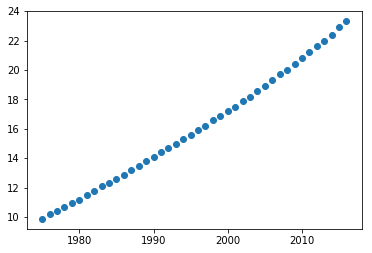

In [9]:
plt.scatter(df.Year, df.obesity_rate)

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.Year,df.obesity_rate)
# premenne, ktore nepotrebujem, mozem nahradit pomocou _
#slope, intercept, _, _, _ = stats.linregress(df.Year,df.obesity_rate)

line = slope * df.Year + intercept

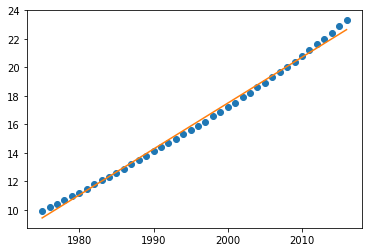

In [11]:
plt.plot(df.Year, df.obesity_rate, 'o', df.Year, line)

Predpoveď pre rok 2300:

In [12]:
slope * 2300 + intercept

114.06722037652264

### Pomocou knižnice `seaborn`

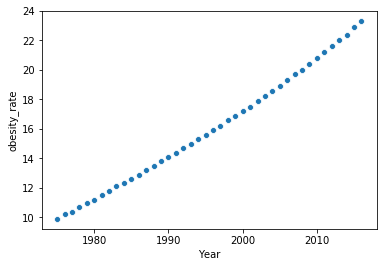

In [13]:
sns.scatterplot(df.Year, df.obesity_rate)

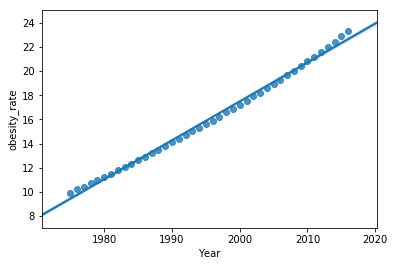

In [14]:
sns.regplot(df.Year, df.obesity_rate)